# 6 Object Detection
- Template matching
- Corner detection
- Edge Detection
- Grid detection
- Contour detection
- Feature matching: most advanced method
- Watershed
- Facial and eye detection with Haar cascades
- Project: blurring license plates

## 6.9 Project: Blurring license plates

In [8]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
plate = cv2.imread('../../data/car_plate.jpg')

In [10]:
plate = cv2.cvtColor(plate, cv2.COLOR_BGR2RGB)

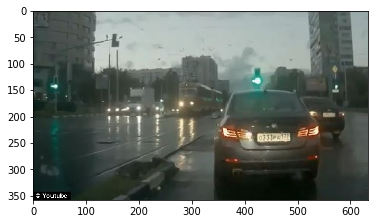

In [11]:
plt.imshow(plate)

In [12]:
def display(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

In [13]:
plate_gray = cv2.cvtColor(plate, cv2.COLOR_RGB2GRAY)

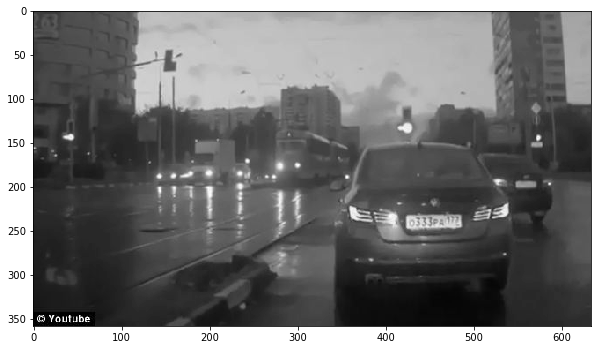

In [14]:
display(plate_gray, cmap='gray')

In [15]:
plate_cascade = cv2.CascadeClassifier('../../data/haarcascades/haarcascade_russian_plate_number.xml')

In [49]:
def detect_plate(img):
    plate_img = img.copy()
    plate_rectangles = plate_cascade.detectMultiScale(plate_img, scaleFactor=1.5, minNeighbors=3)
    for (x,y,w,h) in plate_rectangles:
        cv2.rectangle(plate_img, (x,y), (x+w,y+h), (255, 0, 0), 3)
    return plate_img

In [50]:
plate_rectangles = detect_plate(plate)

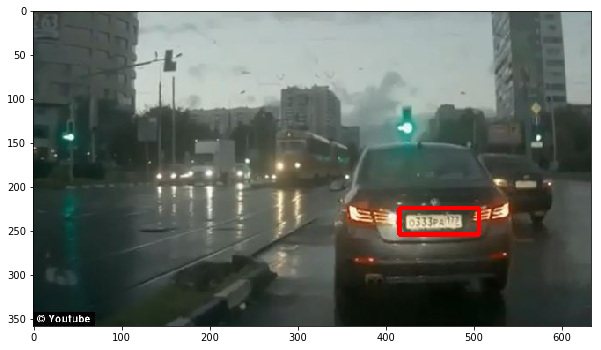

In [51]:
display(plate_rectangles)

In [120]:
def detect_and_blur_plate(img):
    plate_img = img.copy()
    plate_rectangles = plate_cascade.detectMultiScale(plate_img, scaleFactor=1.5, minNeighbors=3)
    for (x,y,w,h) in plate_rectangles:
        # Slice rectangle
        yh = y+h
        xw = x+w
        # NOTE: rows & cols order -> y & x
        plate_slice = plate_img[y:yh,x:xw]
        # Blur slice
        plate_slice_blurred = cv2.medianBlur(plate_slice, ksize=7)
        # Replace blurred slice & return image
        plate_img[y:yh,x:xw] = plate_slice_blurred
    return plate_img

In [121]:
plate_blurred = detect_and_blur_plate(plate)

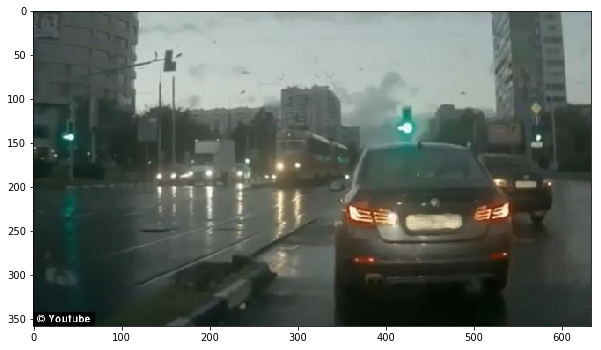

In [122]:
display(plate_blurred)